### Student Information
Name: 黃雅琳 Yalin Huang

Student ID: 10806

GitHub ID: lilyQUQ

Kaggle name: YalinHuang

Kaggle private scoreboard snapshot: 

[Snapshot](./img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM19-Lab2-Master Repo](https://github.com/EvaArevalo/DM19-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/179d01d4dd984fc5ac45a894822479dd) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Nov. 23rd 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM19-Lab2-Homework](https://github.com/EvaArevalo/DM19-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th 11:59 pm, Tuesday)__. 

In [1]:
### Begin Assignment Here

# Part 1. Take Home Exercise

### 1. Data Preparation 

In [2]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

id                                               text emotion  intensity
0  10000  How the fu*k! Who the heck! moved my fridge!.....   anger      0.938
1  10001  So my Indian Uber driver just called someone t...   anger      0.896
2  10002  @DPD_UK I asked for my parcel to be delivered ...   anger      0.896
3  10003  so ef whichever butt wipe pulled the fire alar...   anger      0.896
4  10004  Don't join @BTCare they put the phone down on ...   anger      0.896

In [3]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


----
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [4]:
# Answer here
import seaborn as sns
import matplotlib as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

In [5]:
ct1 = count_vect.fit(train_df.text)
ct2 = count_vect.fit(test_df.text)
train_cts = ct1.transform(train_df.text)
test_cts = ct2.transform(test_df.text)
print('train_counts shape:',train_cts.shape)
print('test_counts shape',test_cts.shape)
train_freq = np.asarray(train_cts.sum(axis = 0)).squeeze()
test_freq = np.asarray(test_cts.sum(axis = 0)).squeeze()

# sorted the term frequency by the counts
train_sort = [(a,b) for a,b in zip(ct1.get_feature_names(), train_freq) ]
train_sort = sorted(train_sort,key=lambda s: s[1],reverse=True )
test_sort = [(a,b) for a,b in zip(ct2.get_feature_names(), test_freq) ]
test_sort = sorted(test_sort,key=lambda s: s[1],reverse=True )
# 
x_train = list(map(lambda x:x[0],train_sort))   # feature_names sorted by frequencies
y_train = list(map(lambda x:x[1],train_sort))   # sorted term_frequency

x_test = list(map(lambda x:x[0],test_sort))   # feature_names sorted by frequencies
y_test = list(map(lambda x:x[1],test_sort))   # sorted term_frequency

train_counts shape: (3613, 1949)
test_counts shape (347, 1949)


-- Top 30 words in train dataset

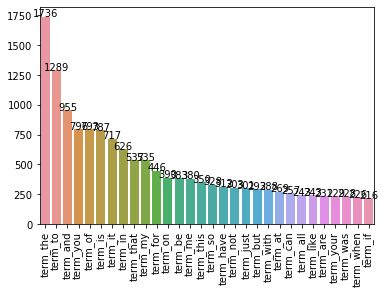

In [6]:
# Barplots
g = sns.barplot(x=x_train[:30], y=y_train[:30])
g.set_xticklabels(['term_'+str(i) for i in x_train[:30]], rotation = 90)
for index, row in enumerate(y_train[:30]):
    g.text(index,row+0.5, row, color='black', ha="center")

-- Top 30 words in Test dataset

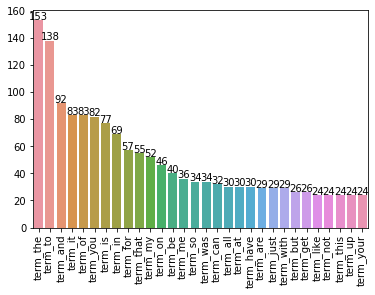

In [7]:
g = sns.barplot(x=x_test[:30], 
            y=y_test[:30])
g.set_xticklabels(['term_'+str(i) for i in x_test[:30]], rotation = 90)
for index, row in enumerate(y_test[:30]):
    g.text(index,row+0.5, row, color='black', ha="center")

---
### 1.2 Save data

In [8]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

### 2. Featrue Engineering

##### 2-1 Bags odf Words

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [10]:
type(train_data_BOW_features)

scipy.sparse.csr.csr_matrix

In [11]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
# check the dimension
print(train_data_BOW_features.shape)
print(train_cts.shape)
print(ct1.get_feature_names()[100:110])

(3613, 10115)
(3613, 1949)
['android', 'angelina', 'angelou', 'anger', 'angry', 'angryman', 'animals', 'animated', 'anjidunlap', 'annemarieiam']


In [13]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names()
feature_names[100:110]

['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

###### Adding Tokenizer and max_length 

In [14]:
import nltk
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [15]:
train_data_BOW_features_500.toarray()

array([[0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names()
feature_names_500[100:110]

['cheerfully',
 'cheering',
 'cheery',
 'come',
 'comes',
 'could',
 'country',
 'cry',
 'customer',
 'damn']

#### 2-2 TF-IDF

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [17]:
# Answer here
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
transformer = TfidfVectorizer(max_features=1000,tokenizer=nltk.word_tokenize)
tfidf = transformer.fit_transform(train_df.text)
tfidf.shape

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lily\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(3613, 1000)

In [18]:
print(tfidf[1,:10])
print(transformer.get_feature_names()[100:110])

  (0, 8)	0.3058942907276966
['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday']


### 3. Model

#### 3-1 Decision Trees

In [19]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [20]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'joy', 'sadness', 'sadness', 'sadness', 'fear', 'fear',
       'joy', 'anger', 'joy'], dtype=object)

##### Results Evaluation

In [21]:
## accuracy
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.64


In [22]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.62      0.64      0.63       110
         joy       0.67      0.68      0.68        79
     sadness       0.61      0.57      0.59        74

    accuracy                           0.64       347
   macro avg       0.64      0.64      0.64       347
weighted avg       0.64      0.64      0.64       347



In [23]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

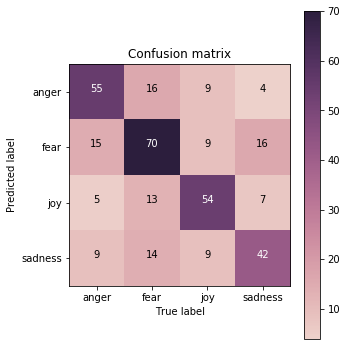

In [24]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

# Answer here

The matrix is composed by 5x5 numbers. Each column represents a true label, 
that is the sum-up of each column equals to the amount of the label. 
Each rows represents a predicted label.   
The numbers on the diagonal is the amount of the true prediction. 
Through this matrix, we can have some points of the training results:
1. the classifier can correctly predict the majority of the data, 
    since the diagonal colors are darker than else.
2. the matrix might has symmetric characteristic, which means some labels share similar feature, 
    so the current classifier has difficulty in disquishing the labels.
    



---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [25]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
# I just use the prior training set and testing set in the MultinomailNB
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

clf = MultinomialNB()
clf.fit(X_train,y_train)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

In [26]:
# Accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=pred_train)
acc_test = accuracy_score(y_true=y_test, y_pred=pred_test)
print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.72


In [27]:
print(classification_report(y_true=y_test, y_pred=pred_test))

              precision    recall  f1-score   support

       anger       0.71      0.65      0.68        84
        fear       0.74      0.83      0.78       110
         joy       0.76      0.71      0.73        79
     sadness       0.65      0.64      0.64        74

    accuracy                           0.72       347
   macro avg       0.71      0.71      0.71       347
weighted avg       0.72      0.72      0.72       347



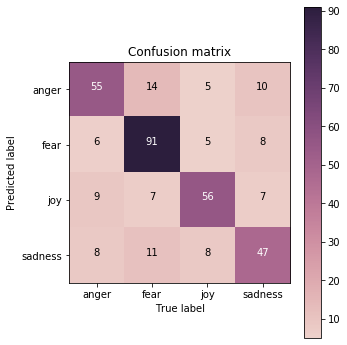

In [28]:
# plot your confusion matrix
cm = confusion_matrix(y_true = y_test, y_pred = pred_test)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

# Answer here
- decision tree:
    - training accuracy: 0.99
    - testing accuracy: 0.64
- Naive classifier:
    - training accuracy: 0.79
    - testing accuracy: 0.72
---
Though decision tree is a very flexable classifier and can do both classification and regression, it still has its shortage.
since simple decision trees tend to over fit on the training dataset, the testing result is not as good as training accuracy.
To avoid this, we need to add tree pruning and tune the pruning procedures.

The Naive classifier is a linear classifier, and can perform well on large dataset.
but if the decision boundry is not clear (not linear, elliptic, or parabolic...), it might not perform so well.

In our case, though we don't know whether if our data set is linear, 
but we certaininly did not prune our decision tree, so the overfitting results into the bad testing accuracy. 

### 4. Deep Learning

4-1 Prepare Data

In [29]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

Using TensorFlow backend.


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


 4-2. Deal with categorical label

In [30]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2055     joy
2642     joy
1872    fear
2132     joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


4-3 Check Input/Output

In [31]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


4-4 Build Model

In [32]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
#model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


4-5 Train

In [33]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')


Train on 3613 samples, validate on 347 samples
Epoch 1/25
3613/3613 [==============================] - 0s 93us/step - loss: 1.3235 - accuracy: 0.3789 - val_loss: 1.2681 - val_accuracy: 0.4409
Epoch 2/25
3613/3613 [==============================] - 0s 37us/step - loss: 0.9650 - accuracy: 0.6648 - val_loss: 0.9069 - val_accuracy: 0.6830
Epoch 3/25
3613/3613 [==============================] - 0s 38us/step - loss: 0.5662 - accuracy: 0.8043 - val_loss: 0.7544 - val_accuracy: 0.7262
Epoch 4/25
3613/3613 [==============================] - 0s 45us/step - loss: 0.4068 - accuracy: 0.8528 - val_loss: 0.7919 - val_accuracy: 0.7061
Epoch 5/25
3613/3613 [==============================] - 0s 48us/step - loss: 0.3210 - accuracy: 0.8896 - val_loss: 0.8055 - val_accuracy: 0.7147
Epoch 6/25
3613/3613 [==============================] - 0s 39us/step - loss: 0.2651 - accuracy: 0.9084 - val_loss: 0.8382 - val_accuracy: 0.6744
Epoch 7/25
3613/3613 [==============================] - 0s 40us/step - loss: 0.217

4-5 Test

In [34]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[9.9968874e-01, 3.8025278e-06, 1.3270291e-07, 3.0733080e-04],
       [4.4245532e-08, 9.4898874e-01, 5.1000182e-02, 1.1030966e-05],
       [5.5579908e-02, 9.6558519e-02, 7.8176552e-01, 6.6096030e-02],
       [1.8737724e-06, 6.8633324e-03, 1.3156317e-08, 9.9313474e-01],
       [6.5380496e-05, 9.9993396e-01, 4.8865837e-07, 2.6776374e-07]],
      dtype=float32)

In [35]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['anger', 'fear', 'joy', 'sadness', 'fear'], dtype=object)

In [36]:
from sklearn.metrics import accuracy_score
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.68


In [37]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log[:5]

epoch  accuracy      loss  val_accuracy  val_loss
0      0  0.378909  1.323470      0.440922  1.268118
1      1  0.664822  0.965045      0.682997  0.906933
2      2  0.804318  0.566229      0.726225  0.754437
3      3  0.852754  0.406801      0.706052  0.791885
4      4  0.889565  0.321045      0.714697  0.805495

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

## Answer here

In [38]:
import matplotlib.pyplot as plt
train_loss= training_log['loss']
test_loss= training_log['val_loss']

train_accu= training_log['accuracy']
test_accu= training_log['val_accuracy']

maxEpoch = np.arange(len(train_loss)) 

Train = (train_accu,train_loss)
Test = (test_accu,test_loss)
Name=('Accuracy','Loss')

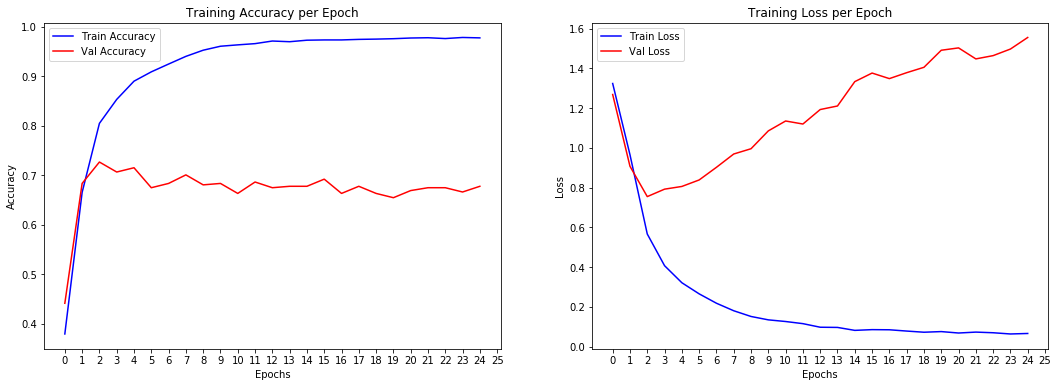

In [39]:
plt.figure(figsize = (18,6))
for i,(train,test,name) in enumerate(zip(Train,Test,Name)):
    plt.subplot(1,2,i+1)
    plt.plot(maxEpoch,train,c='blue',label='Train {}'.format(name))
    plt.plot(maxEpoch,test,c='red',label = 'Val {}'.format(name))
    plt.xticks(np.linspace(0,len(train),len(train)+1))
    plt.xlabel('Epochs')
    plt.ylabel('{}'.format(name))
    plt.title('Training {} per Epoch'.format(name))
    plt.legend()
plt.show()

### (Answer) Interpret the Graph
Through the plot on the left-hand side, we can know that the validation accuracy stop growing at about 0.7, while training accuracy can be promoted to around 0.9. 
In the loss plot on the right-hand side, we can clearly see that the validation loss was decreased, but then increased to about 1.6. In the meantime, the train loss kept showing a trend of loss reducing untill it was convergent.  

Both signs indicated that this model will cause overfitting. To avoid the bad consequence of overfitting, we can setting check points for early stopping or change/tune the model.

### 5. Word2Vector

##### 5-1. Prepare training corpus 

In [40]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

id                                               text  \
2055  30051  Omg. You've got to watch the new series 'This ...   
2642  30638  @colmjoconnor well it was after my heyday too ...   
1872  21015  #nana 4 hoco bc my dream since freshman year a...   
2132  30128  Good morning joyful people. Choose happiness t...   
2574  30570  every time a new Anthony Weiner revelation bre...   

                                         text_tokenized  
2055  [Omg, ., You, 've, got, to, watch, the, new, s...  
2642  [@, colmjoconnor, well, it, was, after, my, he...  
1872  [#, nana, 4, hoco, bc, my, dream, since, fresh...  
2132  [Good, morning, joyful, people, ., Choose, hap...  
2574  [every, time, a, new, Anthony, Weiner, revelat...

In [41]:
test_df['text_tokenized']=test_df['text'].apply(lambda x: nltk.word_tokenize(x))
test_df[['id', 'text', 'text_tokenized']].head()

id                                               text  \
19   10876         Hate when guys cant control their anger 🙃🙃   
210  30839  Good #CX most often doesn't require all that m...   
0    10857  @ZubairSabirPTI  pls dont insult the word 'Molna'   
280  40793  Hello my dear friends, I will be back online t...   
158  21221  Thanks for ripping me off again #Luthansa €400...   

                                        text_tokenized  
19   [Hate, when, guys, cant, control, their, anger...  
210  [Good, #, CX, most, often, does, n't, require,...  
0    [@, ZubairSabirPTI, pls, dont, insult, the, wo...  
280  [Hello, my, dear, friends, ,, I, will, be, bac...  
158  [Thanks, for, ripping, me, off, again, #, Luth...

In [42]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['Omg', '.', 'You', "'ve", 'got', 'to', 'watch', 'the', 'new', 'series', "'This", 'is', 'Us', "'", '...', '..wow', '.', 'Best', 'tv', 'show', 'I', "'ve", 'seen', 'in', 'a', 'long', 'time.\\n', '#', 'tears', '#', 'laughter', '#', 'moretears']),
       list(['@', 'colmjoconnor', 'well', 'it', 'was', 'after', 'my', 'heyday', 'too', 'I', "'m", 'afraid', ',', 'I', 'was', 'expecting', '1st', 'baby', 'I', 'reckon', '.', 'Now', 'aged', '15', '*gulps*', 'I', "'m", 'so', 'old', ':', '-', ')']),
       list(['#', 'nana', '4', 'hoco', 'bc', 'my', 'dream', 'since', 'freshman', 'year', 'awe', '😙❤❤❤', '@', 'thecandeyman'])],
      dtype=object)

##### 5-2 Training "OUR" word2vec model

In [43]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

##### 5-3 Generate word2vec

In [44]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([-0.10152533,  1.0202844 , -0.71706235,  0.208126  ,  0.32547027,
       -0.20557626,  0.20457071, -0.08520125, -0.07057483, -0.8687046 ,
        0.34563345,  0.8473792 ,  0.67003185,  0.13397704,  0.05879307,
       -0.05468297, -0.679306  , -0.2690196 ,  1.0597256 , -0.6738026 ,
       -1.3318465 ,  0.18090476, -0.3514285 , -0.22695982, -0.04434133,
       -0.38590172,  0.707063  ,  0.1663371 , -0.66908884,  0.07329682,
        0.09421267, -0.254521  ,  0.23787019, -0.57571507, -0.36410433,
        0.05491607,  1.15645   ,  1.0418518 ,  0.3406227 , -0.5995535 ,
        0.31426108, -0.6379764 ,  0.38868555,  0.7952555 , -0.4558655 ,
       -0.08559871, -0.7624609 , -0.00550779,  0.42508933, -0.491641  ,
       -0.4027464 ,  0.23512933,  0.0349522 , -0.33542627,  0.8702943 ,
       -0.04056583, -0.00483092, -0.27431238, -0.23133673,  0.50155   ,
        0.01594153,  0.9240582 ,  0.34406647,  0.5472337 , -0.9360141 ,
       -0.15392795,  0.04596914,  0.13156155,  0.4434906 ,  0.62

##### 5-4 Use "Pretrained" word2vec model

(1)word2vec_google

In [45]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437948942184448),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

(2) word2vec_twitter

In [46]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577817916870117),
 ('thank', 0.9376667141914368),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183938980103),
 ('miss', 0.916450023651123),
 ('hello', 0.9158351421356201),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248167037964),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164639472961)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [47]:
def sent2vec(sent,model=word2vec_model):
    tmp = []
    for word in sent:
        vec = model.wv[word]
        tmp.append(vec)
    return tmp

In [48]:
sent = list(map(lambda x: sent2vec(x,word2vec_model) ,train_df['text_tokenized']))

In [49]:
print('sent1 shape:',np.array(sent[0]).shape)
print('sent2 shape:',np.array(sent[1]).shape)

sent1 shape: (33, 100)
sent2 shape: (32, 100)


The length of each sentences are different, so we might need to use "pad_sequence" for the sentences.
following are the steps of the seq2seq I found on the Net:
1. word2id
2. word_embedding 
3. text2sequence
4. pad_sequence

(1) word2id

In [50]:
our_model_word2id = {w:v.index+1 for w, v in word2vec_model.wv.vocab.items()}
our_model_word2id

{'Omg': 1054,
 '.': 3,
 'You': 95,
 "'ve": 90,
 'got': 93,
 'to': 7,
 'watch': 185,
 'the': 4,
 'new': 160,
 'series': 841,
 "'This": 1827,
 'is': 11,
 'Us': 2516,
 "'": 29,
 '...': 32,
 '..wow': 2517,
 'Best': 1230,
 'tv': 650,
 'show': 359,
 'I': 5,
 'seen': 360,
 'in': 14,
 'a': 8,
 'long': 245,
 'time.\\n': 2518,
 '#': 1,
 'tears': 411,
 'laughter': 250,
 'moretears': 2519,
 '@': 2,
 'colmjoconnor': 5168,
 'well': 295,
 'it': 15,
 'was': 38,
 'after': 137,
 'my': 19,
 'heyday': 651,
 'too': 114,
 "'m": 33,
 'afraid': 171,
 ',': 6,
 'expecting': 2520,
 '1st': 1828,
 'baby': 938,
 'reckon': 5169,
 'Now': 344,
 'aged': 2521,
 '15': 528,
 '*gulps*': 5170,
 'so': 26,
 'old': 283,
 ':': 46,
 '-': 64,
 ')': 62,
 'nana': 5171,
 '4': 361,
 'hoco': 5172,
 'bc': 466,
 'dream': 652,
 'since': 362,
 'freshman': 1829,
 'year': 284,
 'awe': 378,
 '😙❤❤❤': 5173,
 'thecandeyman': 5174,
 'Good': 467,
 'morning': 285,
 'joyful': 323,
 'people': 76,
 'Choose': 1830,
 'happiness': 611,
 'have': 25,
 'gr

(2.) word embedding

In [51]:
our_embedding = np.vstack([np.zeros(vector_dim, dtype='float32'), word2vec_model.wv.vectors])
our_embedding

array([[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-4.1671705e-01,  1.0047976e+00, -1.1466705e+00, ...,
        -3.8457152e-01,  1.1259091e+00, -9.1482651e-01],
       [ 2.4357231e-01,  7.6813596e-01,  2.7449131e-01, ...,
        -1.0252628e+00, -1.6367601e+00, -1.7966909e-02],
       ...,
       [-2.3473473e-03,  4.0338986e-02, -2.3197452e-02, ...,
        -5.0210394e-03, -3.0653710e-02, -1.0305583e-02],
       [-3.4631325e-03,  3.8193204e-02, -2.8198121e-02, ...,
        -2.1323405e-02, -3.3731803e-02, -8.9005269e-03],
       [-1.4495035e-03,  3.8572952e-02, -3.2911979e-02, ...,
        -1.5186636e-02, -2.4409527e-02, -8.7562660e-03]], dtype=float32)

In [52]:
word2vec_model.wv.vocab.items()

dict_items([('Omg', <gensim.models.keyedvectors.Vocab object at 0x000001D759981708>), ('.', <gensim.models.keyedvectors.Vocab object at 0x000001D761A1CB48>), ('You', <gensim.models.keyedvectors.Vocab object at 0x000001D7623442C8>), ("'ve", <gensim.models.keyedvectors.Vocab object at 0x000001D762344308>), ('got', <gensim.models.keyedvectors.Vocab object at 0x000001D762344388>), ('to', <gensim.models.keyedvectors.Vocab object at 0x000001D762344408>), ('watch', <gensim.models.keyedvectors.Vocab object at 0x000001D762344448>), ('the', <gensim.models.keyedvectors.Vocab object at 0x000001D762344488>), ('new', <gensim.models.keyedvectors.Vocab object at 0x000001D762344348>), ('series', <gensim.models.keyedvectors.Vocab object at 0x000001D7623443C8>), ("'This", <gensim.models.keyedvectors.Vocab object at 0x000001D7623444C8>), ('is', <gensim.models.keyedvectors.Vocab object at 0x000001D762344508>), ('Us', <gensim.models.keyedvectors.Vocab object at 0x000001D762344548>), ("'", <gensim.models.key

In [53]:
our_embedding.shape

(11964, 100)

In [54]:
len(train_df['text_tokenized'])

3613

(3.)text to tsequence & (4.) pad sequence

In [55]:
from keras.preprocessing.sequence import pad_sequences
def text_to_sequence(text, word2id):
    seq = []
    for w in text:
        i = word2id.get(w)
        if i is not None:
            seq.append(i) 
        else:
            seq.append(0) 
    return seq

train_df['seq_tweet_embedd'] = train_df['text_tokenized'].apply(text_to_sequence, args=(our_model_word2id, ))
test_df['seq_tweet_embedd'] = test_df['text_tokenized'].apply(text_to_sequence, args=(our_model_word2id, ))

In [56]:
tweet_embedd_max_length = 100
X_train_w2v = pad_sequences(train_df['seq_tweet_embedd'], maxlen=tweet_embedd_max_length)
X_test_w2v = pad_sequences(test_df['seq_tweet_embedd'], maxlen=tweet_embedd_max_length)

In [57]:
X_train_w2v

array([[   0,    0,    0, ...,  250,    1, 2519],
       [   0,    0,    0, ...,   46,   64,   62],
       [   0,    0,    0, ..., 5173,    2, 5174],
       ...,
       [   0,    0,    0, ...,   13,   74,   10],
       [   0,    0,    0, ...,   10,    1, 1120],
       [   0,    0,    0, ...,   14,  253,  651]])

----
use the new feature to train the previous deep leaning model.

In [58]:
# I/O check
input_shape = X_train_w2v.shape[1]
output_shape = len(label_encoder.classes_)

from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input
# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)
# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)
# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)
model_output = H3
# create model
model = Model(inputs=[model_input], outputs=[model_output])
# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 60
batch_size = 32

# training!
history = model.fit(X_train_w2v, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test_w2v, y_test))
print('training finish')

Train on 3613 samples, validate on 347 samples
Epoch 1/60
3613/3613 [==============================] - 0s 114us/step - loss: 272.2325 - accuracy: 0.2613 - val_loss: 108.0888 - val_accuracy: 0.2277
Epoch 2/60
3613/3613 [==============================] - 0s 49us/step - loss: 125.6144 - accuracy: 0.2748 - val_loss: 74.1676 - val_accuracy: 0.2478
Epoch 3/60
3613/3613 [==============================] - 0s 51us/step - loss: 84.0836 - accuracy: 0.3078 - val_loss: 57.7190 - val_accuracy: 0.2853
Epoch 4/60
3613/3613 [==============================] - 0s 50us/step - loss: 62.1287 - accuracy: 0.3402 - val_loss: 50.9430 - val_accuracy: 0.2478
Epoch 5/60
3613/3613 [==============================] - 0s 55us/step - loss: 49.3339 - accuracy: 0.3515 - val_loss: 42.4667 - val_accuracy: 0.2507
Epoch 6/60
3613/3613 [==============================] - 0s 54us/step - loss: 40.0964 - accuracy: 0.3659 - val_loss: 38.1207 - val_accuracy: 0.2651
Epoch 7/60
3613/3613 [==============================] - 0s 45us/ste

3613/3613 [==============================] - 0s 57us/step - loss: 2.4881 - accuracy: 0.5674 - val_loss: 8.5884 - val_accuracy: 0.2767
Epoch 57/60
3613/3613 [==============================] - 0s 50us/step - loss: 2.4971 - accuracy: 0.5724 - val_loss: 8.3509 - val_accuracy: 0.2594
Epoch 58/60
3613/3613 [==============================] - ETA: 0s - loss: 2.0794 - accuracy: 0.59 - 0s 52us/step - loss: 2.0813 - accuracy: 0.5954 - val_loss: 7.4465 - val_accuracy: 0.2421
Epoch 59/60
3613/3613 [==============================] - 0s 51us/step - loss: 2.3476 - accuracy: 0.5785 - val_loss: 7.6941 - val_accuracy: 0.2594
Epoch 60/60
3613/3613 [==============================] - 0s 50us/step - loss: 2.1410 - accuracy: 0.5920 - val_loss: 8.6167 - val_accuracy: 0.2622
training finish


### 6. Clustering: k-means


In [60]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [61]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


####  7. High-dimension Visualization: t-SNE

7-1 Prepare visualizing target

In [62]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


7-2 Plot using t-SNE (2 dimensions)

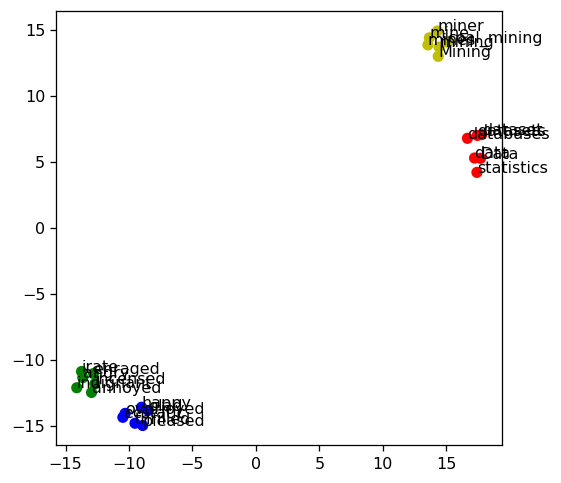

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(5,5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [64]:
# Answer here
word_list = ['happy', 'angry', 'sad', 'fear']
topn = 14
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]     

target_words = happy_words + angry_words + sad_words + fear_words

cn = topn +1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

In [65]:
## w2v model
model = w2v_google_model
## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

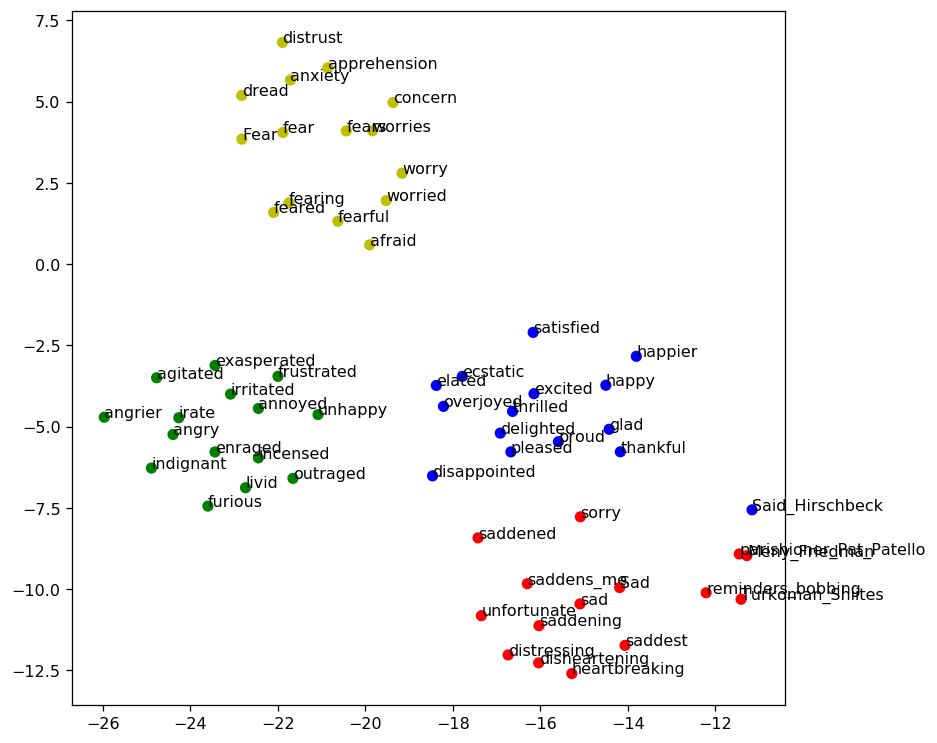

In [66]:
## plot the result
plt.figure(figsize=(8,8), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

#### ** Elmo Embeddings

In [67]:
from keras.preprocessing.text import Tokenizer

#Initializing tokenizer, getting rid of some punctuation
tokenizer_keras = Tokenizer(filters='"#%&()*+,-./:;<=>@[\]^`{|}~')
tokenizer_keras.fit_on_texts(train_df['text'])
train_df['text_tok_keras'] = tokenizer_keras.texts_to_sequences(train_df['text'])
train_df.head()

id                                               text emotion  \
2055  30051  Omg. You've got to watch the new series 'This ...     joy   
2642  30638  @colmjoconnor well it was after my heyday too ...     joy   
1872  21015  #nana 4 hoco bc my dream since freshman year a...    fear   
2132  30128  Good morning joyful people. Choose happiness t...     joy   
2574  30570  every time a new Anthony Weiner revelation bre...     joy   

      intensity                                     text_tokenized  \
2055      0.827  [Omg, ., You, 've, got, to, watch, the, new, s...   
2642      0.327  [@, colmjoconnor, well, it, was, after, my, he...   
1872      0.250  [#, nana, 4, hoco, bc, my, dream, since, fresh...   
2132      0.720  [Good, morning, joyful, people, ., Choose, hap...   
2574      0.375  [every, time, a, new, Anthony, Weiner, revelat...   

                                       seq_tweet_embedd  \
2055  [1054, 3, 95, 90, 93, 7, 185, 4, 160, 841, 182...   
2642  [2, 5168, 295, 15, 38, 137, 19, 651, 114, 5, 3...   
1872  [1, 5171, 361, 5172, 466, 19, 652, 362, 1829, ...   
2132  [467, 285, 323, 76, 3, 1830, 611, 7, 25, 8, 19...   
2574  [192, 73, 8, 160, 2523, 1831, 5175, 1448, 6, 1...   

                                         text_tok_keras  
2055  [635, 517, 86, 2, 70, 1, 122, 822, 1187, 7, 25...  
2642  [4990, 185, 12, 29, 110, 10, 636, 104, 25, 149...  
1872  [4993, 357, 4994, 421, 10, 519, 317, 1813, 267...  
2132  [63, 260, 318, 59, 1189, 480, 2, 19, 4, 150, 6...  
2574  [159, 58, 4, 122, 2514, 1814, 4997, 1424, 823,...

In [68]:
from keras.preprocessing.sequence import pad_sequences

#pad sequences
maxlen = 30 # arbitrary
padded_tokens = pad_sequences(train_df['text_tok_keras'],  maxlen=maxlen, padding="post")
train_df['text_tok_keras'] = list(padded_tokens)
train_df.head()

id                                               text emotion  \
2055  30051  Omg. You've got to watch the new series 'This ...     joy   
2642  30638  @colmjoconnor well it was after my heyday too ...     joy   
1872  21015  #nana 4 hoco bc my dream since freshman year a...    fear   
2132  30128  Good morning joyful people. Choose happiness t...     joy   
2574  30570  every time a new Anthony Weiner revelation bre...     joy   

      intensity                                     text_tokenized  \
2055      0.827  [Omg, ., You, 've, got, to, watch, the, new, s...   
2642      0.327  [@, colmjoconnor, well, it, was, after, my, he...   
1872      0.250  [#, nana, 4, hoco, bc, my, dream, since, fresh...   
2132      0.720  [Good, morning, joyful, people, ., Choose, hap...   
2574      0.375  [every, time, a, new, Anthony, Weiner, revelat...   

                                       seq_tweet_embedd  \
2055  [1054, 3, 95, 90, 93, 7, 185, 4, 160, 841, 182...   
2642  [2, 5168, 295, 15, 38, 137, 19, 651, 114, 5, 3...   
1872  [1, 5171, 361, 5172, 466, 19, 652, 362, 1829, ...   
2132  [467, 285, 323, 76, 3, 1830, 611, 7, 25, 8, 19...   
2574  [192, 73, 8, 160, 2523, 1831, 5175, 1448, 6, 1...   

                                         text_tok_keras  
2055  [635, 517, 86, 2, 70, 1, 122, 822, 1187, 7, 25...  
2642  [4990, 185, 12, 29, 110, 10, 636, 104, 25, 149...  
1872  [4993, 357, 4994, 421, 10, 519, 317, 1813, 267...  
2132  [63, 260, 318, 59, 1189, 480, 2, 19, 4, 150, 6...  
2574  [159, 58, 4, 122, 2514, 1814, 4997, 1424, 823,...

In [69]:
#map back to words
reverse_word_map = dict(map(reversed, tokenizer_keras.word_index.items()))
train_df['text_tok_keras_words'] = train_df['text_tok_keras'].apply(lambda x_list: [reverse_word_map[x] if x>0 else "" for x in x_list])
train_df.head()

id                                               text emotion  \
2055  30051  Omg. You've got to watch the new series 'This ...     joy   
2642  30638  @colmjoconnor well it was after my heyday too ...     joy   
1872  21015  #nana 4 hoco bc my dream since freshman year a...    fear   
2132  30128  Good morning joyful people. Choose happiness t...     joy   
2574  30570  every time a new Anthony Weiner revelation bre...     joy   

      intensity                                     text_tokenized  \
2055      0.827  [Omg, ., You, 've, got, to, watch, the, new, s...   
2642      0.327  [@, colmjoconnor, well, it, was, after, my, he...   
1872      0.250  [#, nana, 4, hoco, bc, my, dream, since, fresh...   
2132      0.720  [Good, morning, joyful, people, ., Choose, hap...   
2574      0.375  [every, time, a, new, Anthony, Weiner, revelat...   

                                       seq_tweet_embedd  \
2055  [1054, 3, 95, 90, 93, 7, 185, 4, 160, 841, 182...   
2642  [2, 5168, 295, 15, 38, 137, 19, 651, 114, 5, 3...   
1872  [1, 5171, 361, 5172, 466, 19, 652, 362, 1829, ...   
2132  [467, 285, 323, 76, 3, 1830, 611, 7, 25, 8, 19...   
2574  [192, 73, 8, 160, 2523, 1831, 5175, 1448, 6, 1...   

                                         text_tok_keras  \
2055  [635, 517, 86, 2, 70, 1, 122, 822, 1187, 7, 25...   
2642  [4990, 185, 12, 29, 110, 10, 636, 104, 25, 149...   
1872  [4993, 357, 4994, 421, 10, 519, 317, 1813, 267...   
2132  [63, 260, 318, 59, 1189, 480, 2, 19, 4, 150, 6...   
2574  [159, 58, 4, 122, 2514, 1814, 4997, 1424, 823,...   

                                   text_tok_keras_words  
2055  [omg, you've, got, to, watch, the, new, series...  
2642  [colmjoconnor, well, it, was, after, my, heyda...  
1872  [nana, 4, hoco, bc, my, dream, since, freshman...  
2132  [good, morning, joyful, people, choose, happin...  
2574  [every, time, a, new, anthony, weiner, revelat...

In [70]:
import tensorflow as tf
import tensorflow_hub as hub

#load elmo
elmo = hub.Module("https://tfhub.dev/google/elmo/3", trainable = True)

#generic way to generate an array of the same length
token_len = np.empty(len(train_df))
token_len.fill(maxlen)

#create embeddings
embeddings = elmo(inputs={"tokens": list(train_df['text_tok_keras_words']),
                          "sequence_len": token_len},
                  signature="tokens",
                  as_dict=True)["elmo"]

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [71]:
#check the Embedding layer dimension
embeddings.shape

TensorShape([Dimension(3613), Dimension(30), Dimension(1024)])

In [72]:
train_df['text'].iloc[0]

"Omg. You've got to watch the new series 'This is Us'.....wow. Best tv show I've seen in a long time.\\n#tears #laughter #moretears"

In [1]:
# this might take a long time, make sure you can run Tf on your computer
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

print("SusannahSpot")
print(sess.run(embeddings[0][0]))

print("I")
print(sess.run(embeddings[0][1]))

print("could")
print(sess.run(embeddings[0][2]))

print("pop")
print(sess.run(embeddings[0][3]))

print("round")
print(sess.run(embeddings[0][4]))

NameError: name 'tf' is not defined

# Part 2. Kaggle Competition 

(see folder : Kaggle_)
- Kaggle_
    - train_data
    - fea_sel
    - logs
    - fea_sel.ipnyb
    - fea_embedded.ipnyb
    - clean_tool.ipnyb
    - data_tool.ipnyb
    - data_loader.ipnyb
    - dnn.ipnyb
    - lstm_keras.ipnyb
    - ML_main.ipnyb
    - final_model_main.ipnyb
    

# Part 3. Kaggle Report

### 1. Import raw data and perform preprocessing

In [26]:
#%run clean_tool.ipynb
!pip install import_ipynb

In [35]:
import import_ipynb
import sys
#sys.path.append('../Kaggle_/data_tool.ipynb')
#import data_tool

###### 1-1 import data
setting import path...

I import the raw data here, and transfrom the .json data into "DataFrame".
since the train dataset and test dataset are mixed up in raw dataset,
so I split thim into 2 parts by the "identification" file,
and then I use :
- pd.merge(train_data,train_label, on='tweet_id') 

to make sure that the data and the corresponding labels are in the same orders.

In [36]:
dataPath = '../Kaggle_/trainData/tweets_DM.json'
identiPath = '../Kaggle_/trainData/data_identification.csv'
labelPath = '../Kaggle_/trainData/emotion.csv'

In [37]:
def loadRawTweet(dataPath):
    '''
    Inputs:
        dataPath:  = './trainData/tweets_DM.json'
    Outputs:
         twee_df: data frame aftre sortation
    '''
    with open(dataPath, encoding = 'utf-8-sig') as json_file:    
    #文件不是標準json文件，故要先將文件重新轉回json
    # the file is not standard json file, so I transform the file into json
        data = (line.strip() for line in json_file)    # 因為文件有多行，直接讀取會出錯，因此一行一行讀取  # read by lines   
        tmp = '[{}]'.format(','.join(data))
        twee_df = pd.read_json(tmp)
    
    # 整理'_source'裡的資料: # sorting out the data in "_source"
    info = {i:[] for i in twee_df['_source'][0]['tweet'].keys()}  
    for idx, tweet in enumerate(twee_df['_source']):  
        for key,data in tweet['tweet'].items():
            info[key].append(data)
            
    new = pd.DataFrame(info)
    twee_df = pd.concat([twee_df,new],axis=1)
#    twee_df.drop(columns = ['_source'])
    return twee_df

In [38]:
def loadData():
    '''
    loading raw data, and make them "DataFame"
    '''
    print('Loading Raw Data...')
    rawData = loadRawTweet(dataPath)
    rawData = rawData.drop(['_source'],axis = 1)
    label = pd.read_csv(labelPath)
    identi = pd.read_csv(identiPath)
    # =============================================================================
    #     spilt into trainning set and testing set
    # =============================================================================
    train_id = identi.loc[identi['identification']=='train']
    test_id  = identi.loc[identi['identification']=='test']
    X_train = pd.DataFrame()
    Y_train = pd.DataFrame()
    X_test = pd.DataFrame()
    Y_test = pd.DataFrame()
    print('Loading training set...')

    tr1 = rawData.tweet_id.isin(train_id['tweet_id'])
    tr2 = label.tweet_id.isin(train_id['tweet_id'])
    X_train = rawData.loc[tr1==True]
    Y_train = label.loc[tr2==True]
    print('Loading testing set...')
    ts1 = rawData.tweet_id.isin(test_id['tweet_id'])
    ts2 = label.tweet_id.isin(test_id['tweet_id'])
    X_test = rawData.loc[ts1==True]
    Y_test = label.loc[ts2==True] 
    
    #--- make sure the ID in X_train and Y_train are by same orders
    ID = X_train['tweet_id']
    Y_train = pd.merge(ID,Y_train,on='tweet_id')
    
    return X_train, Y_train, X_test

In [40]:
import pandas as pd
X_data, Y_data, X_val = loadData()

Loading Raw Data...
Loading training set...
Loading testing set...


###### check Data
---

- the "tweet_id" in  X_data and Y_data have same orders.

In [41]:
X_data.head()

_score          _index           _crawldate   _type  \
0     391  hashtag_tweets  2015-05-23 11:42:47  tweets   
1     433  hashtag_tweets  2016-01-28 04:52:09  tweets   
3     376  hashtag_tweets  2016-01-24 23:53:05  tweets   
5     120  hashtag_tweets  2015-06-11 04:44:05  tweets   
6    1021  hashtag_tweets  2015-08-18 02:30:07  tweets   

                        hashtags  tweet_id  \
0                     [Snapchat]  0x376b20   
1  [freepress, TrumpLegacy, CNN]  0x2d5350   
3                             []  0x1cd5b0   
5      [authentic, LaughOutLoud]  0x1d755c   
6                             []  0x2c91a8   

                                                text  
0  People who post "add me on #Snapchat" must be ...  
1  @brianklaas As we see, Trump is dangerous to #...  
3                Now ISSA is stalking Tasha 😂😂😂 <LH>  
5  @RISKshow @TheKevinAllison Thx for the BEST TI...  
6       Still waiting on those supplies Liscus. <LH>

In [42]:
Y_data.head()

tweet_id       emotion
0  0x376b20  anticipation
1  0x2d5350       sadness
2  0x1cd5b0          fear
3  0x1d755c           joy
4  0x2c91a8  anticipation

In [43]:
X_val.head()

_score          _index           _crawldate   _type  \
2      232  hashtag_tweets  2017-12-25 04:39:20  tweets   
4      989  hashtag_tweets  2016-01-08 17:18:59  tweets   
9       66  hashtag_tweets  2015-09-09 09:22:55  tweets   
30     104  hashtag_tweets  2015-10-10 14:33:26  tweets   
33     310  hashtag_tweets  2016-10-23 08:49:50  tweets   

                             hashtags  tweet_id  \
2                        [bibleverse]  0x28b412   
4                                  []  0x2de201   
9   [materialism, money, possessions]  0x218443   
30               [GodsPlan, GodsWork]  0x2939d5   
33                                 []  0x26289a   

                                                 text  
2   Confident of your obedience, I write to you, k...  
4   "Trust is not the same as faith. A friend is s...  
9   When do you have enough ? When are you satisfi...  
30  God woke you up, now chase the day #GodsPlan #...  
33  In these tough times, who do YOU turn to as yo...

#### 1-2 
- Data Preprocess:
    1. change some abbreviated words into the normal form
    2. remove URL
    3. remove "<LH>" in the sentences
    4. lemmatize
    5.  & tokenization
- Feature Extraction by 1. BOW 2.TFIDF 
- Feature Extraction by selectKBest

Kaggle_/clean_tool.ipnyb 
functions:

In [44]:
import pandas as pd
import numpy as np
import spacy
from tqdm import tqdm
import re
import time
import joblib
from nltk.tokenize import TweetTokenizer
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons
from nltk.stem.snowball import SnowballStemmer
tqdm.pandas()

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [46]:
def removeURL(data):
    print('remove URL')
    data = data.apply(lambda x : re.sub(r'http\S+','',x))
    return data

def removePUNC(data): 
    '''
    remove punctuation in the sentences
    '''
    print('remove punctuation')
    punctuation = '!"#$%&()*+-/:;<=>?@[\\]^_`{|}~,.'
    def rm(x):
        for ch in set(punctuation):
            if ch in x:
                x.remove(ch)
        return x
    data = data.progress_apply(lambda x:rm(x))
    return data
def removeHashtag(data):
    print('remove hashtag')
    data = data.apply(lambda x: x.split('#')[0])
    return data

def removeWP(data):
    print('remove white space')
    data = data.apply(lambda x : ' '.join(x.split()))
    return data
def removeLH(data):
    print('remove <LH')
    data=data.apply(lambda x: x.replace('<LH>',''))
    return data
    
def lemma(data):
    print('lemmatize')
    '''
    動詞原形
    '''
    # nlp=spacy.load('en', disable = ['parser', 'ner'])  #spacy's language model
    nlp = spacy.load('en_core_web_sm')
    # output =[]
    def lamm(sent):
        output = []
        s = [token.lemma_ for token in nlp(sent)]
        output= ' '.join(s)
        return output
    data = data.progress_apply(lambda x:lamm(x))
    # for sent in tqdm(data):
    return data 
    
           
def stemm(data):
    '''
    詞態全部統一 不論名詞動詞
    lemma 結果比 NLP stemming 乾淨(s有去掉)
    '''
    
    stemmer = SnowballStemmer(language='english')
    output =[]
    for sent in data:
        s = stemmer.stem(sent) 
        output.append(' '.join(s))
    return output

def tokenizer(data):
    tknzr = TweetTokenizer()
    data = data.apply(tknzr.tokenize)
    return data

def preprocess(data):
    print('preprocessing')
    text_processor = TextPreProcessor(
        # terms that will be normalized
        normalize=['url', 'email', 'percent', 'money', 
                   'phone', 'user', 'time', 'url', 
                   'date', 'number'],
        # terms that will be annotated
        annotate={"hashtag", "allcaps", 
                  "elongated", "repeated",
                  'emphasis', 'censored'},
        fix_html=True,  # fix HTML tokens
        
        # corpus from which the word statistics are going to be used 
        # for word segmentation 
        segmenter="twitter", 
        
        # corpus from which the word statistics are going to be used 
        # for spell correction
        corrector="twitter", 
        
        unpack_hashtags=True,  # perform word segmentation on hashtags
        unpack_contractions=True,  # Unpack contractions (can't -> can not)
        spell_correct_elong=False,  # spell correction for elongated words
        
        # select a tokenizer. You can use SocialTokenizer, or pass your own
        # the tokenizer, should take as input a string and return a list of tokens
        tokenizer=SocialTokenizer(lowercase=True).tokenize,
        
        # list of dictionaries, for replacing tokens extracted from the text,
        # with other expressions. You can pass more than one dictionaries.
        dicts=[emoticons]
    )
    data = data.progress_apply(text_processor.pre_process_doc)
    return data

def FirstClean(data):
    print('cleaning...')
    replace_pair = [('”', '"'),
                    ('“', '"'),
                    ('’', '\''),
                    ('´', '\''),
                    ('\n', ' '),
                    ('\t', ' '),
                    ('...', ' '),
                    ('--', ' -- '),
                    
                    ('\'m ', ' am '),
                    ('n\'t ', ' not '),
                    ('\'ve ', ' have '),
                    ('\'re ', ' are '),
                    ('\'ll ', ' will '),
                    ('\'d ', ' would '),
                    
                    (' canot ', ' can not '),
                    (' cannot ', ' can not '),
                    (' ca not ', ' can not '),
                    (' dint ', ' did not '), 
                    (' ur ', ' you are '),
                    (' tbh ', ' to be honest '),
                    (' & ', ' and '),
                    (' u ', ' you '),
                    (' r ', ' are '),
                    ('fuckin', 'fucking'),
                    
                    ('<LH>', ' ')]
    data = data.apply(lambda x: re.sub('wtf+', ' what the fuck ', x).strip())
    for pair in replace_pair:
        data = data.apply(lambda x: x.replace(*pair))       
    return data

In [47]:
def clean_data(data,col='text'):
    # data=text_tr
    # data1=text_tr['text'][idx]
    '''
    remove unneccessary URL,whitespace,punctuation
    lemmatization or stemming 
    tokenization
    !! Not Sure should or should not keep ',' '.'
    '''
    data['clean_sent'] = ct.FirstClean(data[col])
    data['clean_sent'] = ct.removeURL(data['clean_sent'])
    data['clean_sent'] = ct.removeWP(data['clean_sent'])
    data['clean_sent'] = ct.removeLH(data['clean_sent'])
    data['clean_sent'] = ct.lemma(data['clean_sent'])  
    data['clean_sent'] = ct.preprocess(data['clean_sent'])
    data['clean_sent'] = ct.removePUNC(data['clean_sent'])
    # data['clean_sent'] = ct.tokenizer(data['clean_sent'])
    return data

In [48]:
class Embedding():
    '''
    train: a list of text 
    '''
    def __init__(self,train,test = None):
        self.train=train
        self.test =test
        self.model = None
#    def word2vec(self):
#        from gensim.models import word2vec
#        from gensim import models
        
    def BOW(self):
        from sklearn.feature_extraction.text import CountVectorizer
        self.model = CountVectorizer(lowercase=True,max_features = 2048)
        # bow_tr,bow_ts = self.run()
        bow_tr = self.model.fit_transform(self.train)
        bow_ts = self.model.transform(self.test)
        return bow_tr,bow_ts
    
    def tfidf(self):
        from sklearn.feature_extraction.text import TfidfTransformer
        
        X_tr, X_ts  =self.BOW()
        self.model = TfidfTransformer()
        # tfidf_tr,tfidf_ts = self.run()
        tfidf_tr = self.model.fit_transform(X_tr)
        tfidf_ts = self.model.transform(X_ts)
        return tfidf_tr,tfidf_ts
    
    def run(self):
        self.model.fit(self.train)
        emb_tr = self.model.transform(self.train)
        # if self.test.empty == False :
        emb_ts = self.model.transform(self.test)
        return emb_tr,emb_ts

In [49]:
def label(Y_data):
    '''
    to transfer the emotion into 0-7 by orders
    '''
    emotion = ['sadness' ,'disgust' ,'anticipation', 'joy' ,'trust' ,'anger', 'fear','surprise']
    label = pd.DataFrame(np.zeros(len(Y_data)))
    for i,emo in enumerate(emotion):
        label.loc[Y_data['emotion']==emo]=i
    joblib.dump(label,'./fea_sel/label/label8.pkl')

In [52]:
import re
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec, KeyedVectors

In [51]:
#pool = multiprocessing.Pool(processes=16)
col = ['_score','hashtags','tweet_id','text']
text_tr = X_data[col]
text_ts = X_val[col]

My lemmatization will take too much time, so I split the data into 5 parts to finish the preprocess.
 - I didn't run the preprocess steps in this jupyter,
and I will just load the feature that I had extracted and saved before.

In [ ]:
# 1. Clean and lemmaitize  
data_tr = pool.map(clean_data(text_tr))
data_ts = pool.map(clean_data(text_ts))
#joblib.dump(data_tr, './fea_sel/text/data_train.pkl')
#joblib.dump(data_ts, './fea_sel/test/data_test.pkl')

sent_tr = data_tr['clean_sent']
sent_ts = data_ts['clean_sent']
# sent_tr=sent_tr.apply(lambda x: ' '.join(x))

In [54]:
tmp = []
for i in range(5):
    tt= joblib.load('../Kaggle_/fea_sel/text/clean-part-{}.pkl'.format(i))
    tmp .append(tt)
X_train = pd.concat(tmp)

tmp = []
for i in range(3):
    tt= joblib.load('../Kaggle_/fea_sel/test/clean-part-{}.pkl'.format(i))
    tmp .append(tt)
X_test = pd.concat(tmp)

In [59]:
sent_tr = X_train['clean_sent'].apply(lambda x: ' '.join(x))
sent_ts = X_test['clean_sent'].apply(lambda x: ' '.join(x))

In [60]:
## wordembedding
# 2-1. word2vec
# 2-2. tfidf
emb_tr,emb_ts = Embedding(sent_tr,sent_ts).tfidf()
# 2-3. BOW 
emb_tr,emb_ts  = Embedding(sent_tr,sent_ts).BOW()

In [62]:
# 3. other feature
hashtag_tr = X_train['hashtags'].apply(lambda x: ' '.join(x))
hashtag_ts = X_test['hashtags'].apply(lambda x: ' '.join(x))

# tmp_tr = pool.map(ct.lemma(hashtag_tr))
# tmp_ts = pool.map(ct.lemma(hashtag_ts))

emb_tr,emb_ts  = Embedding(hashtag_tr,hashtag_ts).BOW()

1-3.
  I use selectKBest to perform feature selection.
- main feature: k = 512/1024/2048
- hashtag: k = 320

In [68]:
# 4. feature selection, dimension reduction 
# pca = PCA(n_components=2)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

y=joblib.load('../Kaggle_/fea_sel/label/label8_ver2.pkl')
sel_f = SelectKBest(f_classif, k=512)
X_train_f = sel_f.fit_transform(emb_tr, y)
X_test_f = sel_f.transform(emb_ts)
#joblib.dump(X_train_f,'./fea_sel/BOW/bow_train-512.pkl')

concatenate the main feature and hashtags features

In [ ]:
# 5. concat. other feature and main feature
XX = joblib.load('./fea_sel/BOW/bow_test-2048.pkl')
xx = joblib.load('./fea_sel/hashtag_test_320.pkl')
import scipy.sparse as sp
con = sp.hstack((XX, xx))
con.shape
#joblib.dump(con,'./fea_sel/BOW/bow_test-2368.pkl')

### 2. Model

At first, I use the Machine learning model with tfidf and BOW as features to train the model.
- model: 
    - SVM
    - logistic regression
    - random tree
    - SGDclassifier

- Featrue:
    - tfidf
    - BOW
    
The results are not so well. The f1_score stucked at 0.3??.

I try to train the basic DNN model with BOW features and tfidf features, but the result of f1_score didn't improve much.
Then I tried the LSTM by keras, but the training process is really time consuming, and the result is not as good as I think it should be.   
- Also, I looked into the f1_score of each emotion, the model can only perform well on predicting the emotion joy. 

So, I think maybe the reason why I could't get the high score is not the model, but the feautre I used. 
or maybe it's because of the unbalance of the data.

After that, I decided to try to use wod2vec to do "text to sequence", then fed it into a DNN model to create the embedding and train the model.
and the result is much better then before.

#### 2-1 feature_embedding

1. word to id
2. word_embedding 
3. text2sequence
4. pad_sequence

In [73]:
import joblib
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec, KeyedVectors

In [74]:
sentences = X_train['clean_sent']

tweet_model_dim = 100
tweet_model = Word2Vec(sentences, 
                       size=tweet_model_dim,
                       sg=1,
                       hs=1,
                       window=5,
                       negative=10,
                       min_count=10,
                       iter=20,
                       workers=8)

In [76]:
tweet_model

In [77]:
tweet_model.wv.vocab.items()

dict_items([('people', <gensim.models.keyedvectors.Vocab object at 0x000002861E642048>), ('who', <gensim.models.keyedvectors.Vocab object at 0x0000028672B20A48>), ('post', <gensim.models.keyedvectors.Vocab object at 0x0000028672B201C8>), ('add', <gensim.models.keyedvectors.Vocab object at 0x0000028672B1E7C8>), ('<allcaps>', <gensim.models.keyedvectors.Vocab object at 0x0000028672B23408>), ('pron', <gensim.models.keyedvectors.Vocab object at 0x0000028672B234C8>), ('</allcaps>', <gensim.models.keyedvectors.Vocab object at 0x0000028672B23D88>), ('-', <gensim.models.keyedvectors.Vocab object at 0x0000028672B233C8>), ('on', <gensim.models.keyedvectors.Vocab object at 0x0000028672B23248>), ('snapchat', <gensim.models.keyedvectors.Vocab object at 0x0000028672B232C8>), ('"', <gensim.models.keyedvectors.Vocab object at 0x0000028672B23148>), ('must', <gensim.models.keyedvectors.Vocab object at 0x0000028672B23348>), ('be', <gensim.models.keyedvectors.Vocab object at 0x0000028672B25488>), ('dehydr

In [78]:
tweet_model_word2id = {w:v.index+1 for w, v in tweet_model.wv.vocab.items()}
tweet_model_embedding = np.vstack([np.zeros(tweet_model_dim, dtype='float32'), tweet_model.wv.vectors])

In [79]:
def text_to_sequence(text, word2id):
    seq = []
    for w in text:
        i = word2id.get(w)
        if i is not None:
            seq.append(i) 
        else:
            seq.append(0) 
    return seq

In [80]:
X_train['seq_tweet_embedd'] = X_train['clean_sent'].apply(text_to_sequence, args=(tweet_model_word2id, ))
X_test['seq_tweet_embedd'] = X_test['clean_sent'].apply(text_to_sequence, args=(tweet_model_word2id, ))
tweet_embedd_max_length = 100
X_train_2 = pad_sequences(X_train['seq_tweet_embedd'], maxlen=tweet_embedd_max_length)
X_test_2 = pad_sequences(X_test['seq_tweet_embedd'], maxlen=tweet_embedd_max_length)

In [81]:
X_train['seq_tweet_embedd']

0          [67, 64, 374, 658, 2, 4, 3, 1, 21, 1109, 36, 2...
1          [7, 63, 2, 4, 3, 1, 61, 198, 5, 2264, 9, 22662...
3                 [69, 2, 557, 3, 5, 3745, 2182, 76, 76, 76]
5          [7, 7, 1576, 13, 8, 2, 756, 3, 60, 172, 35, 42...
6                               [106, 127, 21, 183, 2653, 0]
                                 ...                        
1867526    [2, 4, 3, 1, 5, 25, 98, 18, 18, 0, 8, 258, 16,...
1867527    [15, 153, 0, 2, 4, 3, 1, 87, 48, 9, 5, 247, 9,...
1867528    [81, 5, 1173, 244, 192, 319, 276, 8, 2710, 31,...
1867533    [1054, 3895, 33, 23, 158, 2, 4, 3, 1, 32, 594,...
1867534                              [138, 9, 5, 140, 13322]
Name: seq_tweet_embedd, Length: 1455563, dtype: object

In [82]:
X_train_2

array([[    0,     0,     0, ...,    14,    22,     5],
       [    0,     0,     0, ...,     2,  1662,     3],
       [    0,     0,     0, ...,    76,    76,    76],
       ...,
       [    0,     0,     0, ...,   786,  3555, 28024],
       [    0,     0,     0, ...,     4,     3,     1],
       [    0,     0,     0, ...,     5,   140, 13322]])

The amount of some labels (like joy) is much larger then others,
I think this could lead to the unbalanced learning, so I set a upper limit to the amount of each labels.
   - The upper limit is 24,0000, which is sightly more than the amount of anticipation.

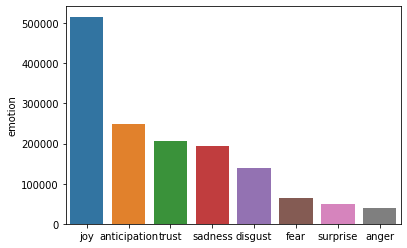

In [88]:
import seaborn
Emotion = pd.read_csv('../Kaggle_/trainData/emotion.csv')
emotion = Emotion['emotion']
seaborn.barplot(x=emotion.value_counts().index, 
                y=emotion.value_counts())

In [87]:
labs = joblib.load('../Kaggle_/fea_sel/label/label_final.pkl')
maxsize = 240000
emotion_list = emotion.unique()
idx_train=[]
for emo in emotion_list:
    size = 0
    for i,e in enumerate(labs['emotion']):
        if e == emo and size <maxsize:
            size+=1
            idx_train.append(i)

#### 2-2 Modeling 

In [129]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils.class_weight import compute_sample_weight, compute_class_weight
from matplotlib import pyplot as plt
import joblib
from sklearn.metrics import f1_score
#from scipy.interpolate import spline
import seaborn
from keras.layers import (Input, Dense, Embedding, Conv2D, SeparableConv2D, MaxPool2D, AvgPool2D, Add, Multiply, Subtract)
from keras.layers import (Reshape, Flatten, Dropout, Concatenate, BatchNormalization, LeakyReLU, Activation, MaxoutDense)
from keras.constraints import max_norm
from keras.activations import softplus, tanh, relu, elu
from keras import regularizers
from keras.losses import binary_crossentropy, categorical_crossentropy
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam, RMSprop, SGD, Nadam
from keras.models import Model
from keras import backend as K

from keras.callbacks import LearningRateScheduler

In [90]:
y_data = joblib.load('../Kaggle_/fea_sel/label/label8_ver2.pkl')
X_train = joblib.load('../Kaggle_/fea_sel/embed_model/emb_train.pkl')[idx_train]
Y_train = pd.Series(y_data)[idx_train]
X_test = joblib.load('../Kaggle_/fea_sel/embed_model/emb_test.pkl')     

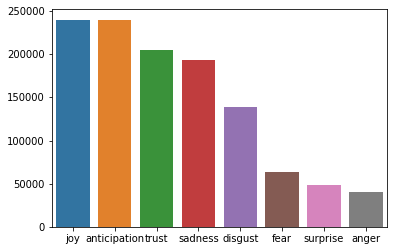

In [100]:
emo_list = ['sadness','disgust','anticipation','joy','trust','anger','fear','surprise']
seaborn.barplot(x=list(map(lambda x: emo_list[x], list(Y_train.value_counts().index))) ,
                y=Y_train.value_counts())

In [101]:
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

lb = LabelBinarizer()
y  = lb.fit_transform(Y_train)

sample_weight = compute_sample_weight('balanced', Y_train)
np.unique(sample_weight, return_counts=True)

(array([0.60969323, 0.71212672, 0.75645494, 1.05194337, 2.28638533,
        3.00286021, 3.67036333]),
 array([480000, 205478, 193437, 139101,  63999,  48729,  39867],
       dtype=int64))

In [130]:
def print_report(y_val, y_val_pred, sample_weight):
    
    print(classification_report(y_true=np.argmax(y_val, axis=1), 
                                y_pred=np.argmax(y_val_pred, axis=1),
                                target_names=list(lb.classes_))
                                )
    print(classification_report(y_true=np.argmax(y_val, axis=1), 
                                y_pred=np.argmax(y_val_pred, axis=1),
                                target_names=list(lb.classes_),
                                sample_weight=sample_weight))
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [131]:
embedding.shape

(36936, 100)

In [135]:
def create_embedding(inputs, embedding, max_document_length, trainable=False, max_norm_value=25):
    
    input_dim, output_dim = embedding.shape
    embedding_layer = Embedding(input_dim=input_dim,
                                output_dim=output_dim,
                                weights=[embedding],
                                input_length=max_document_length,
                                trainable=trainable,
                                embeddings_constraint=max_norm(max_norm_value))(inputs)
    embedding_layer = Reshape((max_document_length, embedding.shape[1], 1))(embedding_layer)
    return embedding_layer
def conv2D(inputs, filter_sizes, num_filters, embedding_dim, max_document_length, activation=None):
    conv2D_list = []
    for size in filter_sizes:
        conv = Conv2D(num_filters, 
                    kernel_size=(size, embedding_dim), 
                    padding='valid',
                    kernel_initializer='glorot_uniform',
                    kernel_constraint=max_norm(200),
                    bias_initializer='zeros')(inputs)
        conv = LeakyReLU()(conv)
        pool_size = (max_document_length - size + 1, 1)
        pooled = MaxPool2D(pool_size=pool_size, 
                            strides=(1, 1), 
                            padding='valid')(conv)
        conv2D_list.append(pooled)
        
    concatenated_tensor = Concatenate(axis=1)(conv2D_list)
    concatenated_tensor = Flatten()(concatenated_tensor)
    return concatenated_tensor
def scheduler(epoch):

    if epoch % 20 == 0 and epoch != 0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr * 0.1)
        print("lr changed to {}".format(lr * 0.1))
    return K.get_value(model.optimizer.lr)


def create_model_1(filter_sizes=(3, 3, 3), 
                   num_filters=150, 
                   embedd_trainable=False, 
                   activation=None):
    K.clear_session()
    inputs_2 = Input(shape=(max_document_length, ), dtype='int32')
    embedding_2 = create_embedding(inputs_2, 
                                   embedding, 
                                   max_document_length, 
                                   trainable=False)
    embedding_3 = create_embedding(inputs_2, 
                                   embedding, 
                                   max_document_length, 
                                   trainable=True)
    embedding_2 = Add()([embedding_2, embedding_3])
    concatenated_tensor_2 = conv2D(embedding_2, 
                                        filter_sizes, 
                                        num_filters, 
                                        100, 
                                        max_document_length)
    concatenated_tensor = Dropout(0.35)(concatenated_tensor_2)
   
    dense_0 = Dense(units=400, 
                    activation='tanh',
                    kernel_constraint=max_norm(30))(concatenated_tensor)
    dense_1 = MaxoutDense(output_dim=32,
                           nb_feature=4,
                           W_constraint=max_norm(3))(dense_0)
    output  = Dense(units=num_label, 
                    activation='softmax',
                    kernel_constraint=max_norm(3))(dense_1)
    
    model = Model(inputs=[inputs_2], outputs=output)
    model.compile(optimizer=SGD(lr=0.1, decay=1e-6, momentum=0.9), 
                  loss=categorical_crossentropy, 
                  metrics=[f1])
    model.summary()
    return model

#### 2-3 Training and validation 

##### control panel
---

In [136]:
embedding = joblib.load('../Kaggle_/fea_sel/embed_model/tweet_model_embedding.pkl')
num_label = len(lb.classes_)
max_document_length = X_train.shape[1]
batch_size = 128
embedding_dim = embedding.shape[1]
reduce_lr = LearningRateScheduler(scheduler)

---

In [ ]:
fake = np.zeros(X_train.shape[0])
for i, (train_index, val_index) in enumerate(skf.split(fake, Y_train)):
    x_train = X_train[train_index]
    y_train = y[train_index]
    x_val = X_train[val_index]
    y_val = y[val_index]
    (sample_weight_train, 
     sample_weight_val) = (sample_weight[train_index], sample_weight[val_index])
    path = '../Kaggle_/fea_sel/embed_model/{}_weights.best.hdf5'.format(i)
    checkpoint = ModelCheckpoint(path, 
                                 monitor='val_f1', 
                                 verbose=1, 
                                 save_best_only=True, 
                                 mode='max')
    print("Creating Model...")
    model = create_model_1()
    model_hist = model.fit([x_train], y_train,
                           sample_weight=None,
                           validation_data=([x_val], y_val, None),
                           batch_size=batch_size,
                           shuffle=True,
                           epochs=30, 
                           verbose=1,
                           callbacks=[checkpoint,reduce_lr])
    model.load_weights(path)

Creating Model...


C:\ProgramData\Anaconda3\lib\site-packages\keras\legacy\layers.py:74: UserWarning: The `MaxoutDense` layer is deprecated and will be removed after 06/2017.
  warnings.warn('The `MaxoutDense` layer is deprecated '


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 100, 100)     3693600     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 100, 100)     3693600     input_1[0][0]                    
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 100, 100, 1)  0           embedding_1[0][0]                
____________________________________________________________________________________________

#### 2-4 predict the Test dataset with the best model I trained 

In [ ]:
import csv
def writer_csv(logPath, logging):
    f = open(logPath,'a')
    w = csv.writer(f,lineterminator = '\r')
    w.writerow(logging)
    f.close() 

model.load_weights(path)              # loading the weights of best model
y_test_pred = model.predict([X_test])  # predict with the test dataset    
test_pred=lb.inverse_transform(y_test_pred) #inverse_transform the prediction into number(0-7)
testID = joblib.load('./fea_sel/test/ID.pkl')

logg = './submission12.csv'   
writer_csv(logg, ['id','emotion'])

# replace the numeric label with emotions
for id_,emo in zip(testID,test_pred):
    if emo == 0: w = 'sadness'
    elif emo == 1: w = 'disgust'
    elif emo == 2: w = 'anticipation'
    elif emo == 3: w = 'joy'
    elif emo == 4: w = 'trust'
    elif emo == 5: w = 'anger'
    elif emo == 6: w = 'fear'
    elif emo == 7: w = 'surprise'
    ww= [id_,w]
    writer_csv(logg, ww)

### 3. Insights  

 This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.